<a href="https://colab.research.google.com/github/dongchimi12/KKJ/blob/main/Contest_test_pile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')   ## 링크 클릭해서 구글 로그인 한후에 드라이브에 데이터 넣고 [3]에 파일 이름만 바꿔주면 됨

Mounted at /content/drive


In [ ]:
test = pd.read_csv('/content/drive/My Drive/contest/test.csv') ## 파일 test에 저장

In [ ]:
test.head(5) ## 위에서 5행까지 출력 test용

,CENTER_CD,CENTER_NM,TEST_YEAR,TEST_ALL_CNT,MEMB_CNT,AGE_GBN_CHILDREN_CNT,AGE_GBN_YOUTH_CNT,AGE_GBN_ADULT_CNT,AGE_GBN_CITIZEN_CNT,INPUT_GBN_ADMIN_CNT,INPUT_GBN_INBODY_CNT,TEST_GBN_GENERAL_CNT,TEST_GBN_TRIP_CNT,TEST_SEX_M,TEST_SEX_W,CERT_GBN_GOLD,CERT_GBN_SILVER,CERT_GBN_BRONZE,CERT_GBN_PARTICIPATION,TEST_AGE_YOUNGER10,TEST_AGE_TEENAGERS,TEST_AGE_TWENTIES,TEST_AGE_THIRTIES,TEST_AGE_FORTIES,TEST_AGE_FIFTIES,TEST_AGE_SIXTIES,TEST_AGE_OLDER70
0,1,국민체력사업팀,2011,82,1,0,0,82,0,0,0,82,0,48,34,7,16,30,29,0,1,28,26,20,6,1,0
1,6,광명,2013,4148,11,0,0,2253,1895,1148,0,4148,0,893,3255,265,650,902,2331,0,63,307,285,320,735,1296,1142
2,6,광명,2011,5,1,0,0,5,0,3,0,5,0,1,4,0,0,3,2,0,0,0,2,0,0,3,0
3,6,광명,2012,3060,1,0,0,3060,0,1447,0,3060,0,649,2411,86,261,625,2088,1,88,347,539,702,968,414,1
4,7,원주,2012,3109,18,0,0,3109,0,2329,0,3109,0,1028,2081,72,248,710,2079,9,73,640,630,796,777,184,0


In [ ]:
test.info() ## 행수 count , datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CENTER_CD               85 non-null     int64 
 1   CENTER_NM               85 non-null     object
 2   TEST_YEAR               85 non-null     int64 
 3   TEST_ALL_CNT            85 non-null     int64 
 4   MEMB_CNT                85 non-null     int64 
 5   AGE_GBN_CHILDREN_CNT    85 non-null     int64 
 6   AGE_GBN_YOUTH_CNT       85 non-null     int64 
 7   AGE_GBN_ADULT_CNT       85 non-null     int64 
 8   AGE_GBN_CITIZEN_CNT     85 non-null     int64 
 9   INPUT_GBN_ADMIN_CNT     85 non-null     int64 
 10  INPUT_GBN_INBODY_CNT    85 non-null     int64 
 11  TEST_GBN_GENERAL_CNT    85 non-null     int64 
 12  TEST_GBN_TRIP_CNT       85 non-null     int64 
 13  TEST_SEX_M              85 non-null     int64 
 14  TEST_SEX_W              85 non-null     int64 
 15  CERT_GBN

In [ ]:
test.isnull().sum() ## 빈칸 찾기

CENTER_CD                 0
CENTER_NM                 0
TEST_YEAR                 0
TEST_ALL_CNT              0
MEMB_CNT                  0
AGE_GBN_CHILDREN_CNT      0
AGE_GBN_YOUTH_CNT         0
AGE_GBN_ADULT_CNT         0
AGE_GBN_CITIZEN_CNT       0
INPUT_GBN_ADMIN_CNT       0
INPUT_GBN_INBODY_CNT      0
TEST_GBN_GENERAL_CNT      0
TEST_GBN_TRIP_CNT         0
TEST_SEX_M                0
TEST_SEX_W                0
CERT_GBN_GOLD             0
CERT_GBN_SILVER           0
CERT_GBN_BRONZE           0
CERT_GBN_PARTICIPATION    0
TEST_AGE_YOUNGER10        0
TEST_AGE_TEENAGERS        0
TEST_AGE_TWENTIES         0
TEST_AGE_THIRTIES         0
TEST_AGE_FORTIES          0
TEST_AGE_FIFTIES          0
TEST_AGE_SIXTIES          0
TEST_AGE_OLDER70          0
dtype: int64

In [ ]:
df = pd.DataFrame(test) ## pandas 이용 dataframe 생성

corr = df.corr(method = 'pearson') ## 상관계수 분석 (전체)
corr

,CENTER_CD,TEST_YEAR,TEST_ALL_CNT,MEMB_CNT,AGE_GBN_CHILDREN_CNT,AGE_GBN_YOUTH_CNT,AGE_GBN_ADULT_CNT,AGE_GBN_CITIZEN_CNT,INPUT_GBN_ADMIN_CNT,INPUT_GBN_INBODY_CNT,TEST_GBN_GENERAL_CNT,TEST_GBN_TRIP_CNT,TEST_SEX_M,TEST_SEX_W,CERT_GBN_GOLD,CERT_GBN_SILVER,CERT_GBN_BRONZE,CERT_GBN_PARTICIPATION,TEST_AGE_YOUNGER10,TEST_AGE_TEENAGERS,TEST_AGE_TWENTIES,TEST_AGE_THIRTIES,TEST_AGE_FORTIES,TEST_AGE_FIFTIES,TEST_AGE_SIXTIES,TEST_AGE_OLDER70
CENTER_CD,1.000000,0.341362,-0.465646,-0.018460,-0.042811,-0.090740,-0.491318,-0.410096,-0.302587,-0.033548,-0.485099,-0.159365,-0.387132,-0.494617,-0.397102,-0.443819,-0.452018,-0.463581,-0.160485,-0.136566,-0.365757,-0.479540,-0.480894,-0.487342,-0.439042,-0.406419
TEST_YEAR,0.341362,1.000000,-0.192335,0.169772,0.182891,0.050407,-0.224587,-0.205746,-0.094239,0.086670,-0.243289,0.002279,-0.119291,-0.231616,-0.153315,-0.171206,-0.176397,-0.198014,-0.111072,0.038475,-0.104536,-0.246269,-0.265153,-0.267312,-0.218414,-0.203822
TEST_ALL_CNT,-0.465646,-0.192335,1.000000,0.333698,-0.175361,0.486034,0.948673,0.841021,0.740940,0.252317,0.868436,0.617298,0.954264,0.979577,0.814213,0.959781,0.982193,0.993269,0.074155,0.573442,0.810990,0.857009,0.857949,0.889034,0.871325,0.828085
MEMB_CNT,-0.018460,0.169772,0.333698,1.000000,0.032350,0.673237,0.200536,0.051546,0.507782,0.613839,0.061378,0.568440,0.495634,0.207707,0.234775,0.338740,0.398896,0.306201,-0.069252,0.688130,0.387620,0.070411,0.030594,0.074655,0.097397,0.039838
AGE_GBN_CHILDREN_CNT,-0.042811,0.182891,-0.175361,0.032350,1.000000,-0.026655,-0.183033,-0.169974,-0.105565,-0.009330,-0.181491,-0.061915,-0.145214,-0.186662,-0.147592,-0.171035,-0.176535,-0.171835,-0.040761,-0.037156,-0.115795,-0.181191,-0.193321,-0.196332,-0.183170,-0.163757
AGE_GBN_YOUTH_CNT,-0.090740,0.050407,0.486034,0.673237,-0.026655,1.000000,0.249926,0.150490,0.670918,0.048803,0.059051,0.876092,0.613160,0.375657,0.414737,0.454630,0.427009,0.500953,-0.086768,0.986424,0.251374,0.184608,0.215992,0.213747,0.166886,0.151047
AGE_GBN_ADULT_CNT,-0.491318,-0.224587,0.948673,0.200536,-0.183033,0.249926,1.000000,0.776794,0.624348,0.308609,0.932470,0.413277,0.868665,0.953926,0.739257,0.894614,0.952992,0.940259,0.226603,0.357149,0.852581,0.931550,0.914377,0.926648,0.843628,0.760210
AGE_GBN_CITIZEN_CNT,-0.410096,-0.205746,0.841021,0.051546,-0.169974,0.150490,0.776794,1.000000,0.501690,0.128577,0.834848,0.353381,0.741630,0.864820,0.740350,0.853810,0.826901,0.822541,-0.167626,0.223376,0.633075,0.678419,0.689935,0.770824,0.939355,0.992165
INPUT_GBN_ADMIN_CNT,-0.302587,-0.094239,0.740940,0.507782,-0.105565,0.670918,0.624348,0.501690,1.000000,0.077723,0.539502,0.622337,0.773750,0.680949,0.737933,0.768625,0.735171,0.713017,0.144405,0.715438,0.510456,0.510757,0.560305,0.621234,0.589009,0.469695
INPUT_GBN_INBODY_CNT,-0.033548,0.086670,0.252317,0.613839,-0.009330,0.048803,0.308609,0.128577,0.077723,1.000000,0.263250,0.085733,0.329267,0.187650,0.056582,0.230737,0.371021,0.221016,-0.033684,0.098217,0.531974,0.165944,0.124640,0.148261,0.183677,0.108879


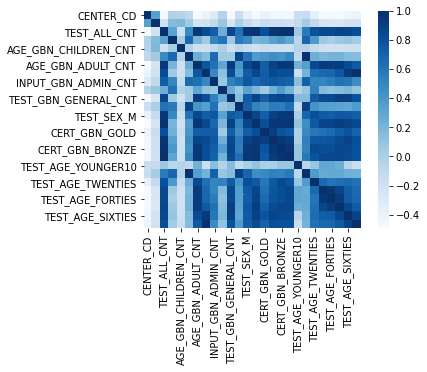

In [ ]:
df_heatmap = sns.heatmap(corr, vmax = 1, cbar = True, annot = False, fmt = '.2f', square = True, cmap = 'Blues') ## heatmap 으로 상관계수 시각화

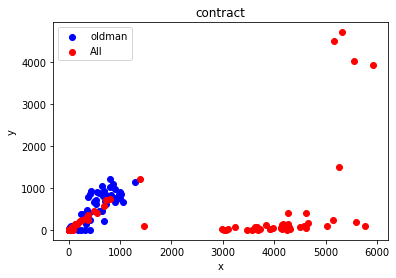

In [ ]:
plt.scatter(test['TEST_AGE_SIXTIES'], test['TEST_AGE_OLDER70'], c='blue') ## 다항 산점도, 변수 시각화
plt.scatter(test['TEST_ALL_CNT'], test['MEMB_CNT'], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('contract')
plt.legend(['oldman', 'All'])
plt.show()

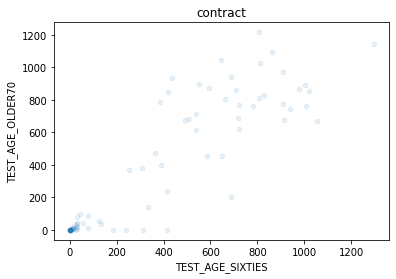

In [ ]:
test.plot(kind="scatter", x="TEST_AGE_SIXTIES", y="TEST_AGE_OLDER70", alpha=0.1, title="contract") ## 산점도 밀집도 분석

==================================================================상관분석

In [30]:
sns.pairplot(test ## 시간오래걸림 하려면 )추가 , 변수를 여러가지 방법으로 시각화하는것

SyntaxError: ignored